<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    5      5  0.4s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [11]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529197795769, 0.9987042941099483]
  * f(x_sol) = 4.1909860490578263e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
---------------------

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### Question 1

In [3]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
using Plots
include("../test/fonctions_de_tests.jl")
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")

# La fonction f1
f1 = fct1
grad_f1 = grad_fct1
hess_f1 = hess_fct1

tn = []
trc = []

for x0 in [pts1.x011, pts1.x012]
    println("\n------------- Point initial: ", x0 , " -------------")

    # Points initiaux
    x0_newton = x0
    x0_rc = x0

    # Algo de Newton
    t = time()
    x_sol_newton, f_sol_newton, _, nb_iters_newton, _ = newton(f1, grad_f1, hess_f1, x0_newton)
    tn = vcat(tn, time() - t)

    # Algo des régions de confiance
    t = time()
    x_sol_rc, f_sol_rc, _, nb_iters_rc, _ = regions_de_confiance(f1, grad_f1, hess_f1, x0_rc, algo_pas = "cauchy")
    trc = vcat(trc, time() - t)

    # Afficher les résultats
    println("Algorithme de Newton:")
    println("Solution trouvée: ", f_sol_newton)
    println("Nombre d'itérations: ", nb_iters_newton)

    println("\nAlgorithme des régions de confiance avec pas de Cauchy:")
    println("Solution trouvée: ", f_sol_rc)
    println("Nombre d'itérations: ", nb_iters_rc)
end

tn_moy = sum(tn) / length(tn)
trc_moy = sum(trc) / length(trc)

println("\nTemps moyen pour l'algorithme de Newton: ", tn_moy)
println("Temps moyen pour l'algorithme des régions de confiance avec pas de Cauchy: ", trc_moy)


------------- Point initial: [1.0, 0.0, 0.0] -------------
Algorithme de Newton:
Solution trouvée: 1.232595164407831e-32
Nombre d'itérations: 1

Algorithme des régions de confiance avec pas de Cauchy:
Solution trouvée: 7.71589405988668e-11
Nombre d'itérations: 33

------------- Point initial: [10.0, 3.0, -2.2] -------------
Algorithme de Newton:
Solution trouvée: 7.296963373294359e-30
Nombre d'itérations: 1

Algorithme des régions de confiance avec pas de Cauchy:
Solution trouvée: 3.233185493810428e-11
Nombre d'itérations: 34

Temps moyen pour l'algorithme de Newton: 0.5370650291442871
Temps moyen pour l'algorithme des régions de confiance avec pas de Cauchy: 0.38732099533081055


Étant donné que $f_1$ est une forme quadratique, elle est déjà égale à son développement de Taylor à l'ordre 2. Ce type de fonction converge en une seule itération vers la solution exacte avec l'algorithme de Newton, comme expliqué précédemment. En revanche, l'algorithme de région de confiance s'avère moins efficace dans ce cas, vu qu'il doit faire un plus grand nombre d'itérations pour arriver à une solution (Cela se remarque à la fois sur le nombre d'itération mais aussi sur le temps d'execution).

Il devient donc important d'analyser les caractéristiques des fonctions pour choisir l'algorithme le plus adapté. En d'autres termes, l'efficacité d'un algorithme n'est pas absolue, elle dépend de la fonction étudiée.

### Question 2

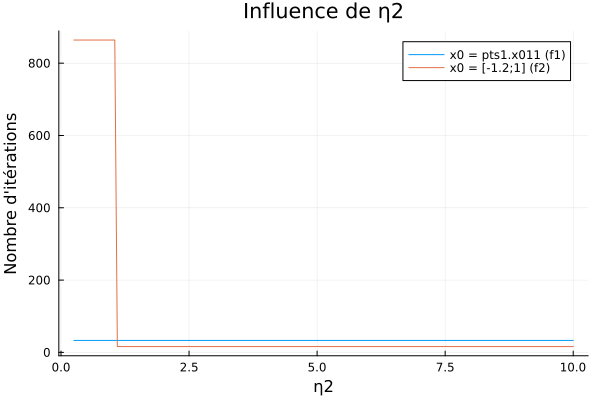

In [11]:
using Plots
include("../test/fonctions_de_tests.jl")
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")

x0_1 = pts1.x011
x0_2 = pts1.x022

tab1 = []
tab2 = []
intervalle_eta2 = range(0.25, 10, step=0.05)

# Calcul des itérations pour x0 = pts1.x011
for eta2 in intervalle_eta2
    _, _, _, nb_iters, _ = regions_de_confiance(
        f1, 
        grad_f1, 
        hess_f1, 
        x0_1, 
        η2 = eta2, 
        algo_pas = "cauchy", 
    )
    push!(tab1, nb_iters)
end

# Calcul des itérations pour x0 = pts1.x012
for eta2 in intervalle_eta2
    _, _, _, nb_iters, _ = regions_de_confiance(
        fct2, 
        grad_fct2, 
        hess_fct2, 
        x0_2, 
        η2 = eta2, 
        algo_pas = "cauchy", 
    )
    push!(tab2, nb_iters)
end

# Tracer les deux courbes
plot(intervalle_eta2, tab1, label="x0 = pts1.x011 (f1)", title="Influence de η2", xlabel="η2", ylabel="Nombre d'itérations")
plot!(intervalle_eta2, tab2, label="x0 = [-1.2;1] (f2)")  # Deuxième courbe en ligne pointillée


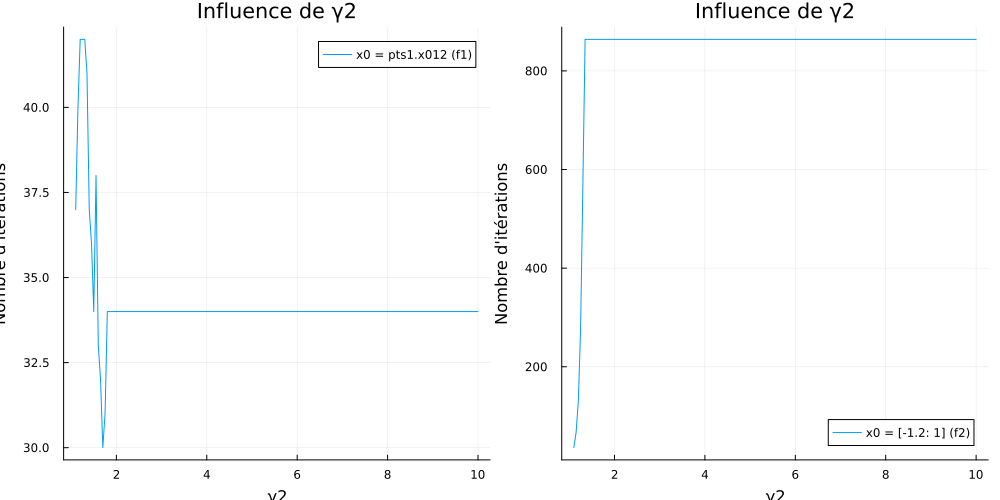

In [19]:
using Plots

include("../test/fonctions_de_tests.jl")
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")

x0_1 = pts1.x012
x0_2 = pts1.x022

tab1 = []
tab2 = []
intervalle_gamma2 = range(1.1, 10, step=0.05)

# Calcul des itérations pour x0 = pts1.x012
for gamma2 in intervalle_gamma2
    _, _, _, nb_iters, _ = regions_de_confiance(
        f1, 
        grad_f1, 
        hess_f1, 
        x0_1, 
        γ2 = gamma2, 
        algo_pas = "cauchy", 
        Δmax = 20
    )
    push!(tab1, nb_iters)
end

# Calcul des itérations pour x0 = pts1.x011
for gamma2 in intervalle_gamma2
    _, _, _, nb_iters, _ = regions_de_confiance(
        fct2, 
        grad_fct2, 
        hess_fct2, 
        x0_2, 
        γ2 = gamma2, 
        algo_pas = "cauchy", 
        Δmax = 20
    )
    push!(tab2, nb_iters)
end

# Tracer les deux courbes
p1 = plot(intervalle_gamma2, tab1, label="x0 = pts1.x012 (f1)", title="Influence de γ2", xlabel="γ2", ylabel="Nombre d'itérations")
p2 = plot(intervalle_gamma2, tab2, label="x0 = [-1.2: 1] (f2)", title="Influence de γ2", xlabel="γ2", ylabel="Nombre d'itérations") 

plot(p1, p2,size=(1000,500))

Il est possible d'ajuster plusieurs paramètres : γ1, γ2 (Les facteurs de mise à jours) et η1, η2 (Les seuils de mise à jour) et $\Delta_{max}$ le rayon maximal, $\Delta_{0}$ le rayon initial (de la région de confiance)

Pour le rayon maximal, on devrait voir une stabilisation à partir d'une certaine valeur, car les points obtenus ne dépassent plus la frontière. On devrait également obtenir le même type de résultat en diminuant fortement $\Delta_{0}$.

Nous nous concentrerons sur l'impact de $\gamma_2$ (un des facteurs de mise à jour) et $\eta_2$ (un des seuils de mise à jour). 

Pour $f_1$, qui est une fonction quadratique, le nombre d'itérations étant fixé, ces paramètres influent peu. 

Pour $f_2$, en revanche, on remarque qu'il est préférable d'avoir un $\eta_2$ grand pour un nombre d'itérations le plus petit possible. Cela est dû au fait que $\eta_2$ définit le seuil d'augmentation de la région de confiance et, s'il est trop petit, la région de confiance augmente trop, ce qui fait augmenter le temps de convergence. Au bout d'un moment, on n'entre plus dans la condition associé à $\eta_2$ d'où la chute d'itération.

Pour $\gamma_2$, on remarque que $\gamma_2$ stagne très vite, ce qui signifie que la région de confiance a rapidement atteint $\Delta_{max}$ et est saturée.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [2]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.6s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [7]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  1.0s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

#### 1 - Pour une itération

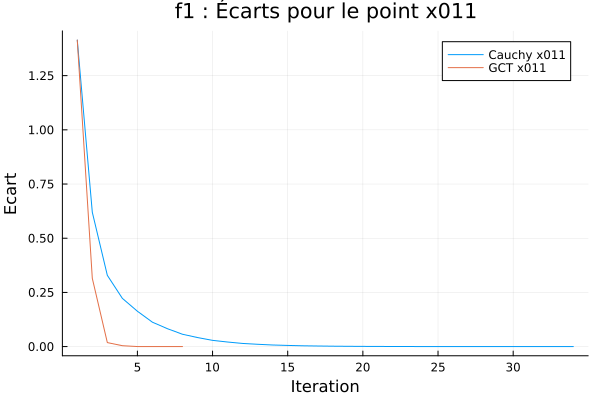

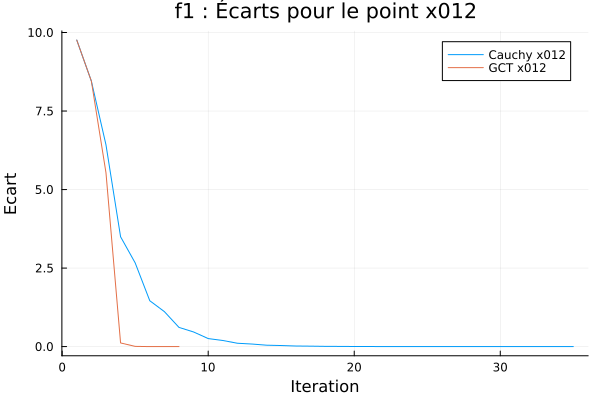

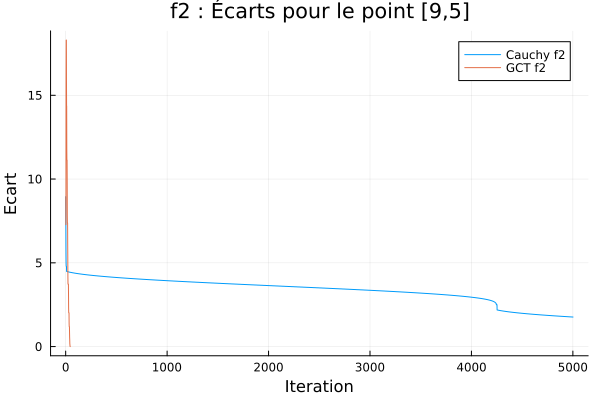

In [30]:
using Plots

include("../src/regions_de_confiance.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
include("../test/fonctions_de_tests.jl")

f1 = fct1
grad_f1 = grad_fct1
hess_f1 = hess_fct1
sol_exacte = [1.0, 1.0, 1.0]

# Utilisation du Pas de Cauchy pour 3 points
xmin_cauchy1, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x011, 
    algo_pas = "cauchy", 
    max_iter_gct = 1
)

xmin_cauchy2, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x012, 
    algo_pas = "cauchy", 
    max_iter_gct = 1
)

xmin_cauchy3, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy3 = regions_de_confiance(
    fct2,
    grad_fct2,
    hess_fct2,
    [9;5],
    algo_pas = "cauchy",
    max_iter_gct = 1
)

# gct
xmin_gct1, f_min_gct, flag_gct, nb_iters_gct, xs_gct1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x011, 
    algo_pas = "gct", 
    max_iter_gct = 1
)

xmin_gct2, f_min_gct, flag_gct, nb_iters_gct, xs_gct2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x012, 
    algo_pas = "gct", 
    max_iter_gct = 1
)

xmin_gct3, f_min_gct, flag_gct, nb_iters_gct, xs_gct3 = regions_de_confiance(
    fct2,
    grad_fct2,
    hess_fct2,
    [9;5],
    algo_pas = "gct",
    max_iter_gct = 1
)

# Comparaison des écarts
function calculer_ecarts(xs, sol_exacte)
    return [norm(x - sol_exacte) for x in xs]
end

#point x011
ecarts_cauchy1 = calculer_ecarts(xs_cauchy1, sol_exacte)
ecarts_gct1 = calculer_ecarts(xs_gct1, sol_exacte)

#point x012
ecarts_cauchy2 = calculer_ecarts(xs_cauchy2, sol_exacte)
ecarts_gct2 = calculer_ecarts(xs_gct2, sol_exacte)

ecarts_cauchy3 = calculer_ecarts(xs_cauchy3, sol_exacte_fct2)
ecarts_gct3 = calculer_ecarts(xs_gct3, sol_exacte_fct2)


println("------- Fonction f1 -------")

println("Écarts pour le point x011:")
println("Pas de Cauchy: ", ecarts_cauchy1)
println("Gradient Conjugué Tronqué: ", ecarts_gct1)

println("\nÉcarts pour le point x012:")
println("Pas de Cauchy: ", ecarts_cauchy2)
println("Gradient Conjugué Tronqué: ", ecarts_gct2)

println("\n------- Fonction f2 -------")

println("\nÉcarts pour le point [-1.2;1]:")
println("Pas de Cauchy: ", ecarts_cauchy3)
println("Gradient Conjugué Tronqué: ", ecarts_gct3)

# Plotting the errors for each iteration on separate graphs
plot1 = plot(1:length(ecarts_cauchy1), ecarts_cauchy1, label="Cauchy x011", xlabel="Iteration", ylabel="Ecart", title="f1 : Écarts pour le point x011")
plot!(plot1, 1:length(ecarts_gct1), ecarts_gct1, label="GCT x011")

plot2 = plot(1:length(ecarts_cauchy2), ecarts_cauchy2, label="Cauchy x012", xlabel="Iteration", ylabel="Ecart", title="f1 : Écarts pour le point x012")
plot!(plot2, 1:length(ecarts_gct2), ecarts_gct2, label="GCT x012")

plot3 = plot(1:length(ecarts_cauchy3), ecarts_cauchy3, label="Cauchy f2", xlabel="Iteration", ylabel="Ecart", title="f2 : Écarts pour le point [9,5]")
plot!(plot3, 1:length(ecarts_gct3), ecarts_gct3, label="GCT f2")

display(plot1)
display(plot2)
display(plot3)

Lors d'une seule itération pour gct, on observe que, pour f1, l'algorithme des régions de confiance utilisant le gradient conjugué tronqué converge (beaucoup) plus rapidement que celui utilisant le pas de Cauchy. De plus, avec f2, on remarque un meilleur écart (c'est à dire plus petit) avec gct comparé à Cauchy

#### 2 - Cas général

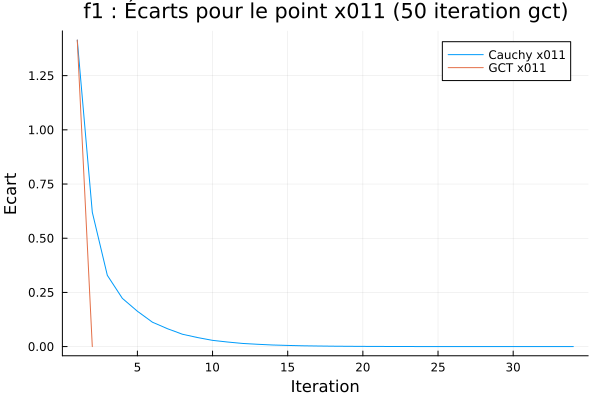

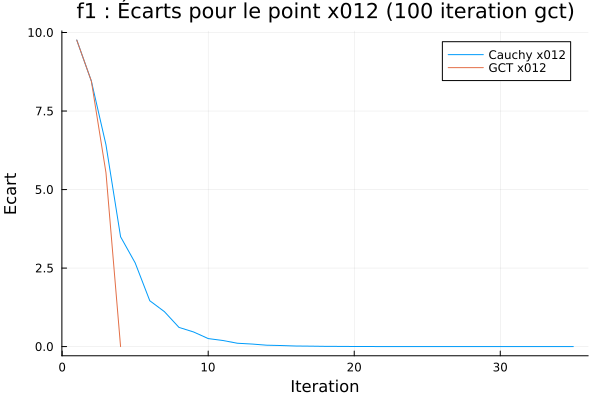

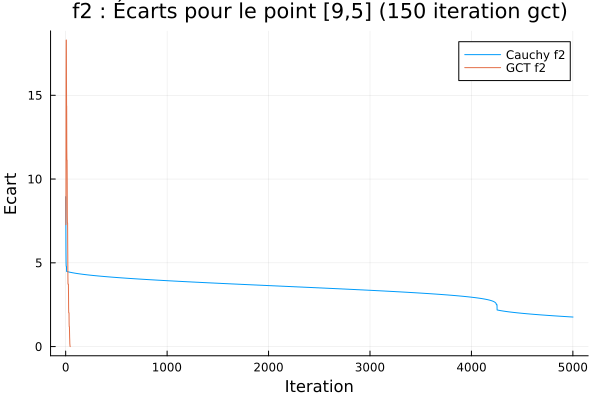

In [33]:
using Plots

include("../src/regions_de_confiance.jl")
include("../src/cauchy.jl")
include("../src/gct.jl")
include("../test/fonctions_de_tests.jl")

f1 = fct1
grad_f1 = grad_fct1
hess_f1 = hess_fct1
sol_exacte = [1.0, 1.0, 1.0]

# Utilisation du Pas de Cauchy pour 3 points
xmin_cauchy1, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x011, 
    algo_pas = "cauchy", 
    max_iter_gct = 50
)

xmin_cauchy2, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x012, 
    algo_pas = "cauchy", 
    max_iter_gct = 100
)

xmin_cauchy3, f_min_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy3 = regions_de_confiance(
    fct2,
    grad_fct2,
    hess_fct2,
    [9;5],
    algo_pas = "cauchy",
    max_iter_gct = 150
)

# gct
xmin_gct1, f_min_gct, flag_gct, nb_iters_gct, xs_gct1 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x011, 
    algo_pas = "gct", 
    max_iter_gct = 50
)

xmin_gct2, f_min_gct, flag_gct, nb_iters_gct, xs_gct2 = regions_de_confiance(
    f1, 
    grad_f1, 
    hess_f1, 
    pts1.x012, 
    algo_pas = "gct", 
    max_iter_gct = 100
)

xmin_gct3, f_min_gct, flag_gct, nb_iters_gct, xs_gct3 = regions_de_confiance(
    fct2,
    grad_fct2,
    hess_fct2,
    [9;5],
    algo_pas = "gct",
    max_iter_gct = 150
)

# Comparaison des écarts
function calculer_ecarts(xs, sol_exacte)
    return [norm(x - sol_exacte) for x in xs]
end

#point x011
ecarts_cauchy1 = calculer_ecarts(xs_cauchy1, sol_exacte)
ecarts_gct1 = calculer_ecarts(xs_gct1, sol_exacte)

#point x012
ecarts_cauchy2 = calculer_ecarts(xs_cauchy2, sol_exacte)
ecarts_gct2 = calculer_ecarts(xs_gct2, sol_exacte)

ecarts_cauchy3 = calculer_ecarts(xs_cauchy3, sol_exacte_fct2)
ecarts_gct3 = calculer_ecarts(xs_gct3, sol_exacte_fct2)


println("------- Fonction f1 -------")

println("Écarts pour le point x011:")
println("Pas de Cauchy: ", ecarts_cauchy1)
println("Gradient Conjugué Tronqué: ", ecarts_gct1)

println("\nÉcarts pour le point x012:")
println("Pas de Cauchy: ", ecarts_cauchy2)
println("Gradient Conjugué Tronqué: ", ecarts_gct2)

println("\n------- Fonction f2 -------")

println("\nÉcarts pour le point [-1.2;1]:")
println("Pas de Cauchy: ", ecarts_cauchy3)
println("Gradient Conjugué Tronqué: ", ecarts_gct3)

# Plotting the errors for each iteration on separate graphs
plot1 = plot(1:length(ecarts_cauchy1), ecarts_cauchy1, label="Cauchy x011", xlabel="Iteration", ylabel="Ecart", title="f1 : Écarts pour le point x011 (50 iteration gct)")
plot!(plot1, 1:length(ecarts_gct1), ecarts_gct1, label="GCT x011")

plot2 = plot(1:length(ecarts_cauchy2), ecarts_cauchy2, label="Cauchy x012", xlabel="Iteration", ylabel="Ecart", title="f1 : Écarts pour le point x012 (100 iteration gct)")
plot!(plot2, 1:length(ecarts_gct2), ecarts_gct2, label="GCT x012")

plot3 = plot(1:length(ecarts_cauchy3), ecarts_cauchy3, label="Cauchy f2", xlabel="Iteration", ylabel="Ecart", title="f2 : Écarts pour le point [9,5] (150 iteration gct)")
plot!(plot3, 1:length(ecarts_gct3), ecarts_gct3, label="GCT f2")

display(plot1)
display(plot2)
display(plot3)

Dans le cas général, on constate comme dans le cas avec 1 itération que l'algorithme avec GCT converge plus rapidement que celui avec Cauchy. Cependant, on ne constate pas de réelle amélioration en augmentant le nombre d'itérations.

### Avantages et inconvénients des deux approches

#### Pas de Cauchy
**Avantages :**
- **Moins coûteux en termes de temps de calcul :** L'algorithme nécessite moins d'opérations pour déterminer le pas optimal à chaque itération
  
**Inconvénients :**
- **Décroissance moins forte et moins rapide :** Le pas de Cauchy peut ralentir la convergence, surtout si la fonction objectif est mal conditionnée ou si les directions de descente ne sont pas bien alignées.

#### Gradient Conjugué Tronqué (GCT)
**Avantages :**
- **Décroissance plus forte et plus rapide :** Le GCT offre une convergence plus rapide, notamment pour les fonctions fortement non linéaires ou mal conditionnées, en raison de son approche plus précise pour ajuster la direction de recherche à chaque itération.

**Inconvénients :**
- **Plus coûteux en termes de temps de calcul :** L'algorithme nécessite un calcul plus complexe à chaque itération, notamment en raison de l'optimisation du gradient conjugué et des tronquages impliqués.

